# Figure 4 and Figure 5: Robustness of Correlations

**Alex B. Nielsen<sup>1,2</sup>, Alexander H. Nitz<sup>1,2</sup>, Collin Capano<sup>1,2</sup>, and Duncan A. Brown<sup>3</sup>**

 <sub>1. [Albert-Einstein-Institut, Max-Planck-Institut for Gravitationsphysik, D-30167 Hannover, Germany](http://www.aei.mpg.de/obs-rel-cos)</sub>  
 <sub>2. Leibniz Universitat Hannover, D-30167 Hannover, Germany</sub>  
 <sub>3. Department of Physics, Syracuse University, Syracuse, NY 13244, USA</sub>  

![Creative Commons License](https://i.creativecommons.org/l/by-sa/3.0/us/88x31.png "Creative Commons License")

This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 United States License](http://creativecommons.org/licenses/by-sa/3.0/us/).

We encourage use of these data in derivative works. If you use the material provided here, please cite [our paper.](https://arxiv.org/abs/1811.04071)

## Set up

Before running this notebook, you should run the [CreateResiduals](https://github.com/gwastro/gw150914_investigation/blob/master/CreateResiduals.ipynb) notebook to download the strain data and compute the maximum likelihood waveform.

In [1]:
import os
import pylab
import res
import pycbc.noise.reproduceable as noise
from pycbc.filter import resample_to_delta_t
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

The plots are written to the directory specified here. You can change the value of `output_dir` to the path where you want the plots to be written.

In [2]:
output_dir = '../paper'
!mkdir -p {output_dir}

## Generate noise

Load in the GW150914 strain data.

In [3]:
strain = res.get_raw_strain()
rstrain = res.get_residual_strain()

Generate simulated data containing Gaussian noise colored using the power spectral density of the real data.

In [4]:
fake_strain = {}
for i, ifo in enumerate(res.ifos):
    psd = strain[ifo].psd(32)
    fake_strain[ifo] = noise.colored_noise(psd, 0, 100, seed=i,
                                           low_frequency_cutoff=15.0)
    fake_strain[ifo] = resample_to_delta_t(fake_strain[ifo], 1.0/4096)

## Figure 4

Five examples drawn at random from simulations of uncorrelated colored Gaussian noise. The same grey shaded region as Fig. 1 is shown. This is the same region that is used to produce the curves plotted in Fig. 3.

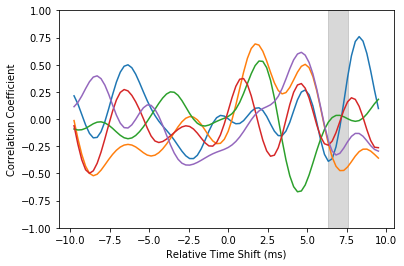

In [5]:
bp = res.bandpass(fake_strain)
pylab.figure()
for i in range(5):
    time = 10 + i
    tau, corr = res.cross_correlation(bp['H1'], bp['L1'], time)
    pylab.plot(tau*1000, corr)
pylab.ylim(-1, 1)
_, _, s, e = res.indices_within_window(corr)
pylab.axvspan(s*1000, e*1000, alpha=0.3, color='grey', zorder=-1)
pylab.ylabel('Correlation Coefficient')
pylab.xlabel('Relative Time Shift (ms)')
pylab.savefig(os.path.join(output_dir,'fig4.pdf'))

## Generate correlation statistic for different choices of parameters

Below we investigate how the correlation statistic depends on arbitrary choices, such as the window size and location, and the size of the bandwidth filter.

### Shift the window back by 0.04s, and increase the width by a factor of 2. Due to the 20ms taken for sliding one detector, this tripples the size of the correlation window.

This keeps the end of the window at the same time.

In [6]:
# Correlation of the regular data
ts = res.bandpass(strain)
tau, corr1 = res.cross_correlation(ts['H1'], ts['L1'], res.corr_time - .04, w=0.08)
print res.corr_near_ml(corr1)

# Correlate the ML subtracted data
ts3 = res.get_residual_strain()
ts3 = res.bandpass(ts3)
tau, corr_null1 = res.cross_correlation(ts3['H1'], ts3['L1'], res.corr_time - .04, w=0.08)
print res.corr_near_ml(corr_null1)

0.9076857617561513
0.1545390849508243


### Shift the window back by 0.005s

In [7]:
# Correlation of the regular data
ts = res.bandpass(strain)
tau, corr2 = res.cross_correlation(ts['H1'], ts['L1'], res.corr_time - .005)
print res.corr_near_ml(corr2)

# Correlate the ML subtracted data
ts3 = res.get_residual_strain()
ts3 = res.bandpass(ts3)
tau, corr_null2 = res.cross_correlation(ts3['H1'], ts3['L1'], res.corr_time - .005)
print res.corr_near_ml(corr_null2)

0.9629514839805262
0.2909722321266465


### Change the bandwidth filter from $f \in [35,350)$ Hz to $f\in [60, 220)$ Hz

In [8]:
# Correlation of the regular data
ts = res.bandpass(strain, 60, 220)
tau, corr3 = res.cross_correlation(ts['H1'], ts['L1'], res.corr_time)
print res.corr_near_ml(corr3)

# Correlate the ML subtracted data
ts3 = res.get_residual_strain()
ts3 = res.bandpass(ts3, 60, 220)
tau, corr_null3 = res.cross_correlation(ts3['H1'], ts3['L1'], res.corr_time)
print res.corr_near_ml(corr_null3)

0.9872337693849724
0.2879861689135011


## Figure 5

Plot showing the effect of changes to the correlation parameters. The dotted lines are data with the signal in, all of which peak strongly at the same value of time shift which is largely unaffected by the changes. All the dotted lines are for the maximum-likelihood waveform subtracted residual data and the effect of the changes has a noticeable effect on the value of the correlation near the offset time of 7ms.

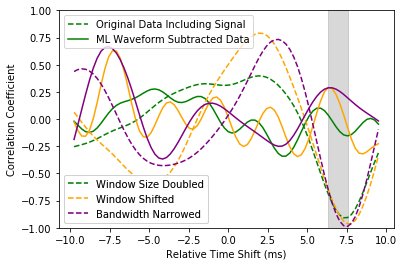

In [9]:
pylab.figure()
l1 = pylab.plot(tau*1000, corr1, label='Original Data including signal', linestyle='--', color='green')
l2 = pylab.plot(tau*1000, corr_null1, label='ML waveform subtracted Data', color='green')

l3 = pylab.plot(tau*1000, corr2, linestyle='--', color='orange')
l4 = pylab.plot(tau*1000, corr_null2, color='orange')

l5 = pylab.plot(tau*1000, corr3, label='Original Data', linestyle='--', color='purple')
l6 = pylab.plot(tau*1000, corr_null3, label='ML subtracted waveform', color='purple')
pylab.xlabel('Relative Time Shift (ms)')

lines = pylab.gca().get_lines()
leg1 = pylab.legend([lines[0], lines[1]], ['Original Data Including Signal', 'ML Waveform Subtracted Data'], loc="upper left")
leg2 = pylab.legend([lines[0], lines[2], lines[4]], ['Window Size Increased', 'Window Shifted', 'Bandwidth Narrowed'], loc="lower left")

_, _, s, e = res.indices_within_window(corr1)
pylab.axvspan(s*1000, e*1000, alpha=0.3, color='grey', zorder=-1)

pylab.gca().add_artist(leg1)
pylab.gca().add_artist(leg2)
pylab.ylabel('Correlation Coefficient')
pylab.ylim(-1, 1)
pylab.savefig(os.path.join(output_dir,'fig5.pdf'))